# PCA 範例
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [6]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.911):
{'logistic__alpha': 0.01, 'pca__n_components': 20}


Text(0,0.5,'explained_variance_ratio')

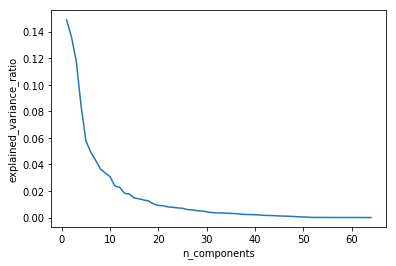

In [10]:
# 繪製不同 components 的 PCA explained variance ratio
ca = PCA(n_components=64)
pca.fit(X_digits)
plt.plot(np.arange(64)+1, pca.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')

In [12]:
# 繪製不同採樣點的 accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, stratify=y_digits, test_size=0.25, random_state=0)

df = pd.DataFrame({}, columns=['n_components', 'accuracy', 'precision', 'recall', 'f1'])
df['n_components'] = [1, 2, 4, 8, 16, 32, 64]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for n_components in [1, 2, 4, 8, 16, 32, 64]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = SGDClassifier(alpha=0.01, loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro'))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
df['accuracy'] = accuracy_scores
df['precision'] = precision_scores
df['recall'] = recall_scores
df['f1'] = f1_scores
df

,n_components,accuracy,precision,recall,f1
0,1,0.253333,0.266935,0.251932,0.190544
1,2,0.424444,0.592228,0.423450,0.446532
2,4,0.773333,0.772403,0.772476,0.766419
3,8,0.866667,0.867971,0.865990,0.863611
4,16,0.942222,0.944061,0.941883,0.942441
5,32,0.951111,0.951585,0.950530,0.950620
6,64,0.940000,0.940308,0.939415,0.939308


Text(0,0.5,'accuracy score')

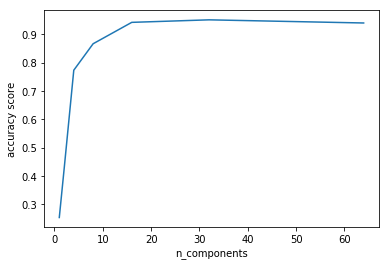

In [13]:
plt.plot(df['n_components'], df['accuracy'])
plt.xlabel('n_components')
plt.ylabel('accuracy score')